# SVC using Sklearn

In [1]:
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv("waterQuality.csv")
df.replace('?',-99999,inplace=True)

In [3]:
x=np.array(df.drop(labels='is_safe',axis=1))
y=np.array(df['is_safe'])

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [6]:
accuracy=clf.score(x_test,y_test)
print(accuracy)

0.975


# SVC from scratch

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [9]:
class Support_vector_machine:
    def __init__(self,visualization=True):
        self.visualization=visualization
        self.colors={-1:'b',1:'r'}
        if self.visualization:
            self.fig=plt.figure()
            self.ax=self.fig.add_subplot(1,1,1)

    

    def fit(self,data):
        self.data=data
        opt_oct={}
        transforms=[[1,1],[1,-1],[-1,-1],[1,-1]]
        all_data=[]
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value=max(all_data)
        self.min_feature_value=min(all_data)
        all_data=None 
        step_sizes=[self.max_feature_value*0.1,self.max_feature_value*0.01]
        b_range_multiple=5
        b_multiple=5
        latest_optimum=self.max_feature_value*10
        
        for step in step_sizes:
            w=np.array([latest_optimum,latest_optimum])
            optimized=False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),self.max_feature_value*b_range_multiple,step*b_multiple):
                    for transformation in transforms:
                        w_t=w*transformation
                        found_option =True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option=False
                        if found_option:
                            opt_oct[np.linalg.norm(w_t)]=[w_t,b]
             
                if w[0]<0:
                    optimized=True
                    print('Optimized a step.')
                else:
                    w=w-step
            norms=sorted([n for n in opt_oct]) 
            opt_choice=opt_oct[norms[0]]
            self.w=opt_choice[0]
            self.b=opt_choice[1]
            latest_optimum=opt_choice[0][0]+step*2
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,":",yi*(np.dot(self.w,xi)+self.b))
                


    def predict(self,features):
        classification=np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification!=0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        def hyperplane(x,w,b,v):
                return (-w[0]*x-b+v)/w[1]
        datarange=(self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min=datarange[0]
        hyp_x_max=datarange[1]
        psv1=hyperplane(hyp_x_min,self.w,self.b,1)
        psv2=hyperplane(hyp_x_max,self.w,self.b,1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2],'k')
        
        nsv1=hyperplane(hyp_x_min,self.w,self.b,-1)
        nsv2=hyperplane(hyp_x_max,self.w,self.b,-1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2],'k')

        db1=hyperplane(hyp_x_min,self.w,self.b,0)
        db2=hyperplane(hyp_x_max,self.w,self.b,0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')
             
        plt.show()

Optimized a step.
Optimized a step.
[1 7] : 1.52000000000104
[2 8] : 1.52000000000104
[3 8] : 1.2000000000008908
[5 1] : 1.6800000000004542
[ 6 -1] : 2.6400000000009025
[7 3] : 1.6800000000004542


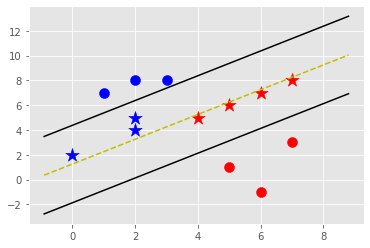

In [10]:
data_dict={-1:np.array([[1,7],[2,8],[3,8]]),1:np.array([[5,1],[6,-1],[7,3]])}
svm=Support_vector_machine()
svm.fit(data=data_dict)
#svm.visualize()


predict_us=[[0,2],[2,4],[2,5],[4,5],[5,6],[6,7],[7,8]]
for p in predict_us:
	svm.predict(p)

svm.visualize()